# Python for Psychologists

This notebook follows the outline of "Matlab for Psychologists" with translation of the code into Python, and more context is provided in that article.
A recommended reference is the [Python for Beginners](https://www.pythonforbeginners.com) website. 

## Getting started

These notes assume that you are either using MacOS / Linux, or Windows with [Powershell](https://docs.microsoft.com/en-us/powershell/scripting/powershell-scripting?view=powershell-6) for command line operations.
I recommend installing the [Anaconda](https://www.anaconda.com/download) distribution of Python version 3.x that is available for most major platforms. This should be done even if you already have a version of Python on your computer. e.g. MacOS has Python built-in but it is the older version 2.7.

The page [Python Setup](https://www.pythonforbeginners.com/basics/python-setup/) describes the basics of getting started.
However, ignore the installation section of that page as you will use Anaconda instead.

If you are not familiar with the command line interface (CLI) to your computer, i.e. the terminal window, then you should take some time to read a tutorial. Here is such a [tutorial for MacOS terminal](http://blog.teamtreehouse.com/introduction-to-the-mac-os-x-command-line).

After installing Anaconda and re-booting your computer, your terminal should be correctly setup to find Python 3.x (currently version 3.6). Try the following command in a terminal to confirm your version.<br>
**python -V**<br>
The result should look like the following line, though you will likely have a newer Python version.<br>
**Python 3.5.4 :: Anaconda custom (64-bit)**

To check the python version in code you would do the following. The details are not important right now, but you should find the code runs without an error or else your Python version is too low.

In [1]:
import sys
print(sys.version_info)
# the major and minor version numbers are printed
print(sys.version_info[0],sys.version_info[1])
#if the following statement causes an error then your version is lower than v.3.0
assert sys.version_info >= (3,0)

sys.version_info(major=3, minor=5, micro=4, releaselevel='final', serial=0)
3 5


To follow this tutorial you will be trying Python commands interactively. Although you can test short code segments interactively in the terminal using ipython, I recommend instead that you use Jupyter notebook which is feature rich and permits longer code chunks.  This program is already installed with your Anaconda installation. To use it with this notebook you should open a terminal and change directory to the one where the notebook file is located. e.g. If your Python course files are in a folder called "IntroToPython" on your desktop then type the following command to change your terminal directory accordingly<br>
**cd ~/Desktop/IntroToPython**<br>
and you can test that it is available by typing the following in the terminal<br>
**jupyter notebook**<br>
which should start the interface in your default web browser. You will see the directory contents which should include the notebook file "Python_for_Psychologists.ipynb". Double-click to open it in your browser.<br>
Please read a good [tutorial for using Jupyter notebook](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).
When you have a Jupyter notebook open you can insert new code blocks and run them interactively. To insert comments you can start a line with the "#" comment symbol or else create a Markdown block such as this one you're reading which provides more ways to beautify your text.<br>
**I'll refer to Jupyter notebook as JN for brevity.**

## Getting help

To get help at anytime in a jupyter notebook you can precede a command name with the "?" symbol. This will show the help in a separate pane at the bottom of your notebook page.
Run the next code block to see how to get help for the len() function.

In [2]:
?len

# Lesson 1 - The Basics

In [3]:
A = 10
A+A

20

In [4]:
B = 5+8
B

13

In [5]:
A = 15
A

15

To clear a variable from memory (and not just set it to zero) then use **del**. <br>
There is no analogue to "clear all" in Python but if you need to do this in your notebook then use the Jupyter Notebook Kernel menu. e.g. Kernel / Restart and Clear Output to restore to the initial state.
Or else use the **%reset** command as shown below but this is only used with ipython or Jupyter notebook.

In [6]:
B=1
del B
#The next statement to display B causes an error because B is no longer defined.
#print(B)


To see variables in the workspace<br>
    **dir()** dictionary of in-scope variables:<br>
    **globals()** dictionary of global variables<br>
    **locals()** dictionary of local variables


In [7]:
#Get a list of variables in the local scope (which includes hidden variables from your jupyter notebook)
dir()

['A',
 'In',
 'Out',
 '_',
 '_3',
 '_4',
 '_5',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'quit',
 'sys']

In [8]:
#this will clear the user-defined variables, when using JN. I've commented it out because it stops execution 
#  following lines.
# %reset

In [9]:
dir()

['A',
 'In',
 'Out',
 '_',
 '_3',
 '_4',
 '_5',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'quit',
 'sys']

# Lesson 2 - Matrices and Punctuation

In general, there are several ways to manipulate a set of data that could represent a vector or matrix. I recommend:<br>
 - if there is only a need to do simple operations like **sum** then a built-in *list* might suffice.<br>
 - if matrix/vector multiplication will be required then use a Numpy *array*.<br>
 - if the data is mixed with non-numeric then start with a Pandas *dataframe* from which you can extract *arrays*.<br>

For this lesson, we'll stick to Numpy operations and objects.<br>
Here's a good [cheat sheet for Numpy operations](https://www.dataquest.io/blog/numpy-cheat-sheet/).
And here's a guide to [Numpy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html).
 

In [10]:
#obtain the external module numpy whose commands we will specify by name (alias) np
import numpy as np
#Scalar array
A = np.array(10)
#Vector array
B = np.array([1,2,3])
print(A)
print(B)
#create row vector then reshape to be a column vector
C = np.array([4,3,8])
C = C.reshape(-1,1) #-1 indicates number of rows is inferred from specified number of columns (1)
print(C)

10
[1 2 3]
[[4]
 [3]
 [8]]


In [11]:
#Matrix
D = np.array([[5,6,7,9],
              [8,3,5,3],
              [5,6,3,2]])
print(D)

[[5 6 7 9]
 [8 3 5 3]
 [5 6 3 2]]


In [12]:
#Element
#convert an array of size 1 (scalar array) into an ordinary scalar element
print(type(A))
a = np.asscalar(A)
print(a)
print(type(a))

<class 'numpy.ndarray'>
10
<class 'int'>


## Brackets

As shown above you can enter data by initializing np.array() with a list in square brackets [].
There is more than one method to create a column vector, one shown above and another below.

In [13]:
D = np.array([[3],[1],[6],[5]])
print(D)

[[3]
 [1]
 [6]
 [5]]


To create a 2D matrix you can use a nested list for initialization, one list in \[...] for each row. To access row 2, column 3 of E then index it by using the indices.
**Important** Unlike Matlab, Python starts indices from 0 (not 1) so row 2 is indexed by 1, column 3 by index 2 and in general row m by m-1 and column n by n-1.

In [14]:
E = np.array([[1,2,3],[4,5,6]])
print(E[1][2])

6


In [15]:
#this produces an indexing error
#print(E[3][4])

To change part of a matrix you can also use square brackets.

In [16]:
E[0][2]= 10 #or it is fine to use E[0,2]=10
print(E)

[[ 1  2 10]
 [ 4  5  6]]


In [17]:
#add a row
E = np.concatenate((E, [[7,8,9]]), axis=0) 
print(E)

[[ 1  2 10]
 [ 4  5  6]
 [ 7  8  9]]


## Colon (indexing)
You can read about this in the [Numpy reference](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

In [18]:
#here the : means "every row" because it is before the comma, and 1 indexes the 2nd column.
E[:,1]

array([2, 5, 8])

In [19]:
#here the : means "every column" because it is after the comma, and 1 indexes the 2nd row.
E[1,:]

array([4, 5, 6])

In [20]:
#we get a list of consecutive integers by range() and initialize an array with it
# NOTE that python indicates the range by start to end+1 (11) rather than start to end.
F=np.array(range(5,11))
F

array([ 5,  6,  7,  8,  9, 10])

In [21]:
#convert to a 2D matrix with 1 row and as many columns as the original size of F
F = F.reshape(1,F.size)
print(F)
# everything in columns 3, 4 and 5 of F. NOTE that using a colon in the list specify the columns is not allowed.
F[:,[2,3,4]]

[[ 5  6  7  8  9 10]]


array([[7, 8, 9]])

In [22]:
#use a step for counting when creating a consecutive integer list from 3 to 20, in steps of 4.
# NOTE that range does NOT use colons and the format is (start, end+1, step)
G = np.array(range(3, 21, 4))
print(G)

[ 3  7 11 15 19]


Python has no analogue to the "Array Editor" of Matlab.

# Lesson 3 - Indexing
There is no builtin function in Python to create a magic square so we will input it from scratch.

In [23]:
A=np.array([[17,24,1,8,15],
            [23,5,7,14,16],
            [4,6,13,20,22],
            [10,12,19,21,3],
            [11,18,25,2,9]])

In [24]:
#store 4th row, 3rd column element of A in B
B=A[3,2]
print(B)


19


In [25]:
#store 4th row of A in C
C=A[3,:]
print(C)

[10 12 19 21  3]


In [26]:
#extract 2nd and 3rd row of A and store in D
D=A[[1,2],:]
print(D)

[[23  5  7 14 16]
 [ 4  6 13 20 22]]


In [27]:
#extract columns 1 to 3 of D, for all rows.
E=D[:,[0,1,2]]
print(E)

[[23  5  7]
 [ 4  6 13]]


In [28]:
#alternative, compact way to extract a range of columns using the list built from range() of consecutive numbers
# building a list explicitly as follows is not necessary but can help with debugging because you can see the list.
# print([x for x in range(0,3)]) 
E=D[:,range(0,3)]
print(E)

[[23  5  7]
 [ 4  6 13]]


In [29]:
#set the 3rd row,3rd column of A to 100.
A[2,2]=100
print(A)

[[ 17  24   1   8  15]
 [ 23   5   7  14  16]
 [  4   6 100  20  22]
 [ 10  12  19  21   3]
 [ 11  18  25   2   9]]


In [30]:
#set the 4th column to 0
A[:,3]=0
print(A)

[[ 17  24   1   0  15]
 [ 23   5   7   0  16]
 [  4   6 100   0  22]
 [ 10  12  19   0   3]
 [ 11  18  25   0   9]]


## Lesson 4 - Basic math
Some vector/matrix can be accomplished with concise operators (like + or -) while others require a Numpy function.

In [31]:
#vector addition
A=np.array([1,2])
B=np.array([5,6])
C = A + B
print(C)

[6 8]


In [32]:
#transpose to get a column vector from the original row vector.
# Note that you can do this even if C was a row vector instead of a 2D matrix. 
print(C.T)
C = np.array([6,8])
D = C.T
#matrix multiplication, in this case producing a scalar.
print(np.matmul(C,D))

[6 8]
100


**np.matmul** for matrix multiplication<br>
**np.multiply** for element-wise multiplication<br>
**np.dot** for dot product of two arrays<br>
**np.divide** for element-wise division<br>
**np.power** for raising a matrix to a power<br>


In [33]:
#simple math doesn't require numpy
print(174*734)

127716


In [34]:
#simple math with a scalar variable. NOTE that A is not changed here.
A=10
print((A*2)/5)


4.0


In [35]:
#2D matrix is multiplied elementwise by the scalar A. The 2nd line and indent is for clarity, not required.
E=np.array([[1,2,3],
            [4,5,6]])
J= E*A
print(J)

[[10 20 30]
 [40 50 60]]


In [36]:
#matrix subtraction
K = J - E
print(K)

[[ 9 18 27]
 [36 45 54]]


In [37]:
#create a 2D matrix
L=np.array([[3,2,1],[9,5,6]])
print(L)

[[3 2 1]
 [9 5 6]]


In [38]:
#element-wise division
print(K/L) 

[[ 3.  9. 27.]
 [ 4.  9.  9.]]


In [39]:
#element-wise multiplication of two matrices with same shape.
print(E*L)

[[ 3  4  3]
 [36 25 36]]


## Lesson 5 - Basic functions
Functions can be used in Python similarly to Matlab.

In [40]:
#sum the columns of K. axis=0 means the vertical direction, axis=1 means horizontal direction
print(np.sum(K,axis=0))

[45 63 81]


In [41]:
#sum the rows of K.
print(np.sum(K,axis=1))

[ 54 135]


In [42]:
#find the mean of J (for each column) and store in mj
mj = np.mean(J, axis=0)
print(mj)

[25. 35. 45.]


In [43]:
#transpose of K
print(K.T)

[[ 9 36]
 [18 45]
 [27 54]]


In [44]:
#create a matrix of random numbers with 3 rows and 5 columns
#random is submodule of numpy. Here the function gives 15 element vector with values in [0,1]
rows = 3
cols = 5
R = np.random.rand(rows*cols)
#reshape from row vector to 3x5 matrix.Here the 'rows' variable could be replaced by -1 and numpy will calculate it.
R = np.reshape(R, (rows,cols))
print(R)

[[0.20705365 0.40951726 0.06914135 0.73041845 0.17151359]
 [0.5623204  0.24635172 0.27199303 0.56752919 0.23231437]
 [0.22477468 0.23114559 0.28097835 0.19189659 0.62082012]]


## Lesson 6 - Logical Operators
Most of the logical operators are the same in Python and Matlab. A difference is that 'not' is indicated by the exclamation point (!) rather than tilde (~).<br>
- < Greater than
- < Less than
- == Equal
- != Not equal
- & AND
- | OR
- ! NOT
<br>
In Python, we can apply boolean operations to arrays and the result is a Boolean array which are represented as "True" or "False" (although these are treated as 1 or 0 respectively for most operations).

In [45]:
A = np.array([1,5,3,4,8,3])
B = A>2
print(B)
print("An element of B is type:", type(B[0]))

[False  True  True  True  True  True]
An element of B is type: <class 'numpy.bool_'>


In [46]:
C = A<5
print(C)

[ True False  True  True False  True]


In [47]:
D = B & C
print(D)

[False False  True  True False  True]


In [48]:
#extract the array from A where the boolean array D was True (i.e. condition D was met)
E = A[D]
print(E)

[3 4 3]


In [49]:
#can do this extraction in one line without the intermediate arrays.
print(A[(A>2) & (A<5)])

[3 4 3]


In [50]:
#convert a logical index (D) into a subscript index (F). D is a mask, where 3rd, 4th and 6th values of D are True.
F=np.where(D)
print(F)

(array([2, 3, 5]),)


In [51]:
#These indices can be used to extract the array from A meeting condition D (same result as above)
print(A[F])

[3 4 3]


In [52]:
#some data that corresponds to each cat. e.g. age
data = np.array([4,14,6,11,3,14,8,17,17,12,10,18])
#type of cat (of 3 types)
cat = np.array([1,3,2,1,2,2,3,1,3,2,3,1])

In [53]:
#the parentheses are for clarity only. Which cats are type 2?
cat2 = (cat == 2)
print(cat2)

[False False  True False  True  True False False False  True False False]


In [54]:
#show the data (age) of type 2 cats.
data2 = data[cat2]
print(data2)

[ 6  3 14 12]


In [55]:
#find the mean of the data of type 2 cats. NOTE np.average() is equivalent.
print(np.mean(data2))

8.75


In [56]:
#and here is the same calculation in compact form
print(np.average(data[cat==2]))

8.75


## Lesson 7 - Missing Data
Missing data (NaNs) in Python are represented with np.nan. There are also a variety of calculators which will ignore missing data including:<br>
- np.nansum()
- np.nanmean()
- np.nanvar()
- np.nanstd()

In [57]:
print(np.nan)

nan


In [58]:
#dtype converts this from a integer to boolean array
err = np.array([1,0,0,0,0,0,0,1,0,1,0,0],dtype=bool)
print(err)
#Let's set all of the data with errors to np.nan so that they will be ignored in subsequent calc
# first convert the data to float type which is compatible with np.nan insertion (unlike integer arrays)
newdat = np.array(data,dtype=float)
print(newdat)
# insert the np.nan where the errors are according to mask err.
newdat[err==True] = np.nan
print(newdat)

[ True False False False False False False  True False  True False False]
[ 4. 14.  6. 11.  3. 14.  8. 17. 17. 12. 10. 18.]
[nan 14.  6. 11.  3. 14.  8. nan 17. nan 10. 18.]


In [59]:
#Now the extracted data of cat type 2 will have NaN in it
data2 = newdat[cat2]
print(data2)

[ 6.  3. 14. nan]


In [60]:
#If use the ordinary mean() we get "nan" meaning "can't calculate on this array"
print(np.mean(data2))

nan


In [61]:
#Therefore we use the nanmean() instead
print(np.nanmean(data2))

7.666666666666667


## Lesson 8 - Basic Graphs
There are multiple graphing options available in Python. The most common 2D plotting option is Matplotlib, and it is also the most similar to Matlab plot().


In [62]:
#sequence of 30 numbers from 0 to 2PI, i.e. the radian argument
x = np.linspace(0, 2*np.pi, num=30)
print(x)

[0.         0.21666156 0.43332312 0.64998469 0.86664625 1.08330781
 1.29996937 1.51663094 1.7332925  1.94995406 2.16661562 2.38327719
 2.59993875 2.81660031 3.03326187 3.24992343 3.466585   3.68324656
 3.89990812 4.11656968 4.33323125 4.54989281 4.76655437 4.98321593
 5.1998775  5.41653906 5.63320062 5.84986218 6.06652374 6.28318531]


In [63]:
#corresponding array of sin() values.
y = np.sin(x)
print(y)

[ 0.00000000e+00  2.14970440e-01  4.19889102e-01  6.05174215e-01
  7.62162055e-01  8.83512044e-01  9.63549993e-01  9.98533414e-01
  9.86826523e-01  9.28976720e-01  8.27688998e-01  6.87699459e-01
  5.15553857e-01  3.19301530e-01  1.08119018e-01 -1.08119018e-01
 -3.19301530e-01 -5.15553857e-01 -6.87699459e-01 -8.27688998e-01
 -9.28976720e-01 -9.86826523e-01 -9.98533414e-01 -9.63549993e-01
 -8.83512044e-01 -7.62162055e-01 -6.05174215e-01 -4.19889102e-01
 -2.14970440e-01 -2.44929360e-16]


In [64]:
z = 0.5 + np.cos(x/2)
print(z)

[ 1.5         1.49413796  1.47662056  1.44765317  1.40757542  1.35685718
  1.29609307  1.22599549  1.14738628  1.06118707  0.96840844  0.87013816
  0.76752834  0.661782    0.55413891  0.44586109  0.338218    0.23247166
  0.12986184  0.03159156 -0.06118707 -0.14738628 -0.22599549 -0.29609307
 -0.35685718 -0.40757542 -0.44765317 -0.47662056 -0.49413796 -0.5       ]


In [65]:
import matplotlib.pyplot as plt
# Using "tab:..." for colors gives alternate colors that are easier on the eyes.
#plt.plot(x, y, 'b-o', color='tab:blue')
#plt.plot(x, z, 'r--', color='tab:red')
# NOTE that the marker conventions are nearly identical.
plt.plot(x, y, 'b-o')
plt.plot(x, z, 'r--')
plt.xlabel('x')
plt.title('a couple of lines')
#note that the legend items need to be in a list
plt.legend(['y=sin(x)','z=0.5+cos(x/2)'])
#The next line creates a interactive popup if it is in your script (instead of JN where it inserts it in the notebook)
plt.show()
#In a script you would normally save a figure as follows (but this is incompatible with the above plt.show)
# plt.savefig('Figure.png')  
plt.close()  #good form to close (clean up) at end otherwise you might have bad effects on following figures.

## Lesson 9 - Basic scripts
Writing and using scripts is the main way the typical non-programmer scientist would use Python. There are differences of opinion about the meaning of script but for my purposes it is
- a human-readable text file containing Python commands.
- simple structure with only a small number of functions.
<br>


You will write Python scripts with a texteditor (e.g. Atom, Notepad++) or an Integrated Development Environment (IDE) such as Spyder, which is built into the Anaconda package.<br>
The following descriptions will assume you are using a texteditor (not an IDE) as this is the most common choice.<br>
Comment lines begin with "#" hashtag symbol.
You will run scripts by opening the Terminal program (or alternatives like iTerm2) and typing <br>
<b>python <i>scriptname.py</i></b><br>
This assumes that python has been installed and can be found ("on the path") within terminal, and that in your terminal session your current working directory is the same as the script named <i>scriptname.py</i>. This keeps things simple but you may instead want to specify the fullpathname of the script. An example on MacOS where the script is on your Desktop would be:<br>
<b>python /Users/pradau/Desktop/myscript.py</b><br>

To avoid the hassle of typing python at the start each time you should put the "shebang" at the start of your script to indicate this is a Python script. e.g.<br>
<b>#!/usr/bin/env python</b><br>
In the terminal, change the permissions so that the script is an "executable" on your system.
<br>
<b>chmod a+x myscript.py</b><br>
This permits you to run the script as follows:<br>
<b>./myscript.py</b>

Unlike Matlab, you will not need to use the semi-colon (;) to suppress showing the result of each line. This is the default behavior in Python. Instead you will need to use a print() statement to show the variable or result of the calculation. (NOTE that in JN these are displayed by default.)<br>
Here is a simple script using data of a previous lession to 
- find the mean of the data in each of the 3 categories
- put all of these into a variable mdat
- plot the results. <br>

Enter these into your text editor and save it as "myscript.py"

[0. 0. 0.]
[12.5   8.75 12.25]


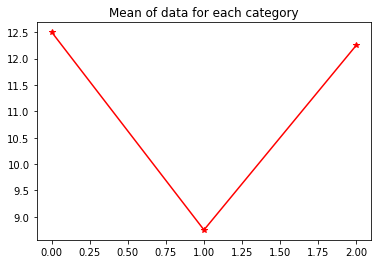

In [66]:
#!/usr/bin/env python
# this script plots the mean of data for each category
import numpy as np
import matplotlib.pyplot as plt
data=np.array([4, 14, 6, 11, 3, 14, 8, 17, 17, 12, 10, 18])
cat = np.array([1, 3, 2, 1, 2, 2, 3, 1, 3, 2, 3, 1])
#must initialize the array
mdat = np.zeros(3)
print(mdat)
mdat[0] = np.mean(data[cat==1])
mdat[1] = np.mean(data[cat==2])
mdat[2] = np.mean(data[cat==3])
print(mdat)
#x = [0,1,2]
x = range(0,3)
plt.plot(x, mdat,'r-*')
plt.title('Mean of data for each category')
plt.savefig('Figure-script.png')  


## Lesson 10 - Flow Control
### If...else

In [67]:
#Python doesn't require an 'end' for the end of a block (e.g. if). This is accomplished by indentation.
A = 10
if A > 5:
    B = 1
else:
    B = 0
print(B)

1


In [68]:
#some error checking we could have used in the earlier lesson
if len(cat) != len(data):
    print('ERROR: Data and categories are not the same length')
    sys.exit(1)  #This means exit with a return code indicating a problem.
else:
    print('No problem with array lengths.')

No problem with array lengths.


### For

In [69]:
#This is a "non-pythonic" way to achieve the desired result. The loop is relatively slow.
# Setting the data type to integer is not usually necessary but with numpy the default is float.
#initialize an empty array of 0 elements
A = np.empty(0,dtype=int)  
for i in range(1,5):
    A = np.append(A, [i*2])
    print(A)    

[2]
[2 4]
[2 4 6]
[2 4 6 8]


In [70]:
#A pythonic way to do this is to use a list comprehension to create the sequence that initializes the array.
A = np.array([i*2 for i in range(1,5)])
print(A)

[2 4 6 8]


In [71]:
#Similarly we can create for loop to calculate the entries of mdat
#some data that corresponds to each cat. e.g. age
data = np.array([4,14,6,11,3,14,8,17,17,12,10,18])
#type of cat (of 3 types)
cat = np.array([1,3,2,1,2,2,3,1,3,2,3,1])
print(data[cat==1])
for i in range(0,3):
    # note the +1 because our indexing is base 0 but the categories are 1,2,3 (no 0)
    mdat[i] = np.mean(data[cat==i+1])
print(mdat)


[ 4 11 17 18]
[12.5   8.75 12.25]


In [72]:
#Here is the pythonic (faster) alternative.
mdat = np.array([np.mean(data[cat==i+1]) for i in range(0,3)])
print(mdat)


[12.5   8.75 12.25]


### Switch
There is no direct parallel to switch. This simple example could be accomplished with a Python dictionary but in the real case where there are several lines of code for each case, the typical solution would be "if...elif...else"


In [73]:
A=3
if A == 1:
    print('A is one')
elif A == 3:
    print('A is three')
elif A == 5:
    print('A is five')
else:
    print('A is not one or three or five')

A is three


### While

In [74]:
x = 1
y = -5
while x==1:
    y +=1
    print(y)
    if y > 1:
        x = 2
        

-4
-3
-2
-1
0
1
2


### Try ... Except
The python version of Try...catch in Matlab is Try...Except. This has the identical purpose of catching errors that would otherwise cause the system to throw an error and exit.<br>
Note that it is better to use <b>with</b> if you are working with files to provide a context manager that handles errors.

In [75]:
A = np.array(range(1,11))
B = np.array(range(1,6))
C = np.empty(0)
print(A)
print(B)
#remember the base 0 indexing.
for i in range(0,len(A)):
    try:
        C = np.append(C,A[i] + B[i])
        print(C)
    except:
        print('B is too small')
        #sys.exit(1)  #We would use exit(1) to end the script with an error
        break  #use break to just exit the loop without quitting or returning an error code

[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3 4 5]
[2.]
[2. 4.]
[2. 4. 6.]
[2. 4. 6. 8.]
[ 2.  4.  6.  8. 10.]
B is too small


## Lesson 11 - Functions
The syntax for Python functions is slightly different than Matlab. In this example the function is <b>nearest()</b>. In the body of the script it would be called like this:<br>
<b>index = nearest(vector, point)</b>



In [76]:
def nearest(vector, point):
    ''' this function finds the index of the number in the vector which is closest in absolute terms to the 
    point. If there is more than one match, only the 1st is returned. (This is the docstring)'''
    df = np.abs(vector - point)
    print('df',df)
    ind = np.argmin(df) #argmin() finds the index where df is minimum. Only first occurrence returned.
    return ind
    
vector = np.array(range(-5,5))
point = np.array(range(20,10,-1))*1.5
print(vector)
print(point)
print('nearest index', nearest(vector,point))

[-5 -4 -3 -2 -1  0  1  2  3  4]
[30.  28.5 27.  25.5 24.  22.5 21.  19.5 18.  16.5]
df [35.  32.5 30.  27.5 25.  22.5 20.  17.5 15.  12.5]
nearest index 9


### Paths
When your program needs to check paths you will want to use the module <b>os</b>.


In [77]:
import os
#print the current working directory
print(os.getcwd())

/Users/pradau/Dropbox/ChildrensHospital/scripts/PythonIntroNotebooks


In [78]:
#to see the environment variable PATH where terminal will look for files. 
print(os.getenv("PATH"))

/Users/Shared/anaconda3/anaconda3/bin:/Users/Shared/anaconda3/anaconda3/bin:/Users/Shared/anaconda3/bin:/Users/pradau/fsl/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/bin:/opt/X11/bin:/usr/local/munki:/Users/pradau/abin


## Lesson 12 - More about variables
### Saving and loading your data
The easiest way to load and save (i.e. read and write in typical terminology) data is to use the Pandas module. This will take care of most of the details that you would need to do yourself if you use the lower level functions in Python (e.g. read() and write()).


In [11]:
import pandas as pd
import numpy as np
x = 2
y = 3.5
z = 'Hello'
data = np.array([5,2,3])
df = pd.DataFrame()
# append each data item as a new row
#ignore_index ensures the index remains sequential after each append.
df = df.append({'Data':x}, ignore_index=True)
df = df.append({'Data':y}, ignore_index=True)
df = df.append({'Data':z}, ignore_index=True)
df = df.append({'Data':data}, ignore_index=True)
print(df)
# Save it to file called "some_stuff.csv" in comma delimited (csv) format.
#  index field is set to False so that we don't have row indices saved in the file.
df.to_csv('some_stuff.csv', index=False)

        Data
0          2
1        3.5
2      Hello
3  [5, 2, 3]


In [12]:
#to read this data back into a new dataframe
dfnew = pd.read_csv('some_stuff.csv')
print(dfnew)

      Data
0      2.0
1      3.5
2    Hello
3  [5 2 3]


In [13]:
#there are many options for reading/writing DataFrames 
# e.g. writing a tab delimited file (sep) with no index in the first column and no column title
dfnew.to_csv('mydata.txt', sep='\t', index=False, header=False)

The method shown above where we appended each kind of data in a single column is generally less desirable than creating a 2D dataframe where each column is a type, and each row has the values for these types. Here's an example of creating two rows in a dataframe with multiple types.


In [14]:
x2 = 25
y2 = -25.7
z2 = 'World'
data2 = np.array([13,15,17])
#note that we have to make the numpy array into a list with the [] so it is the initialization knows it is
#  to go into a single cell.
row1 = {'x':x, 'y':y, 'z':z, 'data':[data]}
row2 = {'x':x2, 'y':y2, 'z':z2, 'data':data2}

df3 = pd.DataFrame(row1)
df3 = df3.append(row2, ignore_index=True)
print(df3)

           data   x     y      z
0     [5, 2, 3]   2   3.5  Hello
1  [13, 15, 17]  25 -25.7  World


The difficulty with inserting arrays into DataFrame cells is that they are converted into strings which will require parsing for use in calculations. One would deal this in either of two ways. The first is to create a separate Dataframe with a column (or row) for each array. Then each cell would have a integer or float type and the entire column could be converted from a Series to numpy array.<br>
This is fine if the number of elements is fixed for all the columns. But for data with arrays that may vary in length or generally for more flexibility, the alternative method is to use a list of dictionaries. The length of the list, and the size and shape of each dictionary can vary, therefore this method is useful for less structured data. Here's an example, with a 3rd record (set of data) added with a different number of elements to illustrate the benefit of this method.

In [32]:
x3 = 26.9
y3 = 55.7
z3 = 'Third record.'
zz3 = ['an', 'example','list']
data3 = np.array([13,15,17,25.7,34.6,88])
datalist = []
#we convert the numpy arrays to float type (instead of integer) and lists to make it easier to write the file (i.e. enable JSON encoding).
data_enc = list(np.array(data,dtype=float))
data2_enc = list(np.array(data2,dtype=float))
data3_enc = list(data3)
datalist.append({'x':x, 'y':y, 'z':z, 'data':data_enc})
datalist.append({'x':x2, 'y':y2, 'z':z2, 'data':data2_enc})
datalist.append({'x':x3, 'y':y3, 'z':z3, 'zz':zz3, 'data':data3_enc})
print(datalist)

[{'data': [5.0, 2.0, 3.0], 'y': 3.5, 'x': 2, 'z': 'Hello'}, {'data': [13.0, 15.0, 17.0], 'y': -25.7, 'x': 25, 'z': 'World'}, {'zz': ['an', 'example', 'list'], 'y': 55.7, 'data': [13.0, 15.0, 17.0, 25.7, 34.6, 88.0], 'x': 26.9, 'z': 'Third record.'}]


I would recommend writing/reading this data as a [JSON](https://www.w3schools.com/python/python_json.asp) format file as it is human-readable, flexible and has well-developed supporting Python libraries.  In debugging it is useful to test that your data is correctly formatted which you can do with an online [JSON Validator](https://jsonlint.com/).<br>
We can easily write out the data using the <b>json</b> library.

In [33]:
import json
with open('datalist.txt', 'w') as file:
    #sort_keys, indent and separators fields make the output file easier to read.
    json.dump(datalist, file, sort_keys=True, indent=4, separators=(',', ':'))


And then it is simple to read the data back into a new variable (read_datalist) given knowledge of the structure that was saved. Notice that using the arrays is now straight-forward: convert the stored list to a numpy array.

In [38]:
with open('datalist.txt', 'r') as readfile:
    read_datalist = json.load(readfile)

#some examples of how to use the JSON data that was read from file.
print('read_datalist')
print(read_datalist)
print('zz variable of third record')
print(read_datalist[2]['zz'])
print('numpy array from first record')
print(np.array(read_datalist[0]['data']))
print('standard deviation from array of 2nd record')
print(np.std(read_datalist[1]['data']))


read_datalist
[{'data': [5.0, 2.0, 3.0], 'y': 3.5, 'x': 2, 'z': 'Hello'}, {'data': [13.0, 15.0, 17.0], 'y': -25.7, 'x': 25, 'z': 'World'}, {'data': [13.0, 15.0, 17.0, 25.7, 34.6, 88.0], 'y': 55.7, 'zz': ['an', 'example', 'list'], 'x': 26.9, 'z': 'Third record.'}]
zz variable of third record
['an', 'example', 'list']
numpy array from first record
[5. 2. 3.]
standard deviation from array of 2nd record
1.632993161855452


### Strings and cells
There are both simple and complex ways to manipulate strings.

In [18]:
firstname = 'Joe'
surname = 'Bloggs'
fullname = firstname + ' ' + surname
print(fullname)

Joe Bloggs


In [19]:
#here is a simple concatenation with a conversion of the age to a string
age = 25
agestring = fullname + ' ' + str(age) + ' years old'
print(agestring)

Joe Bloggs 25 years old


In [85]:
#for more complex formatting it is recommended to use format()
agestring2 = fullname + ' {0} months old'.format(str(age*12))
print(agestring2)

Joe Bloggs 300 months old


In [86]:
#to create a non-numeric array (eg. all strings) use the DataFrame
# this is the case where the columns of the array have no titles
stimuli = pd.DataFrame([['dog','cat','horse','rat'],['car','train','hammer','van']])
print(stimuli)


     0      1       2    3
0  dog    cat   horse  rat
1  car  train  hammer  van


In [87]:
#show one cell at row1 column 3. (0,2 in base 0 indexing)
print(stimuli.iloc[0][2])

horse


In [88]:
#can select a single row (index0)
animals = stimuli.iloc[0,:]
print(animals)

0      dog
1      cat
2    horse
3      rat
Name: 0, dtype: object


In [89]:
#this syntax is used to get the sub-array where the value is 'cat'
print(animals[animals=='cat'])

1    cat
Name: 0, dtype: object


Here is an example of extracting a series of numbers from a DataFrame and converting it to a numpy array. This is often necessary to enable the full range of numeric functions available in numpy.


In [90]:
#extract a column from dataframe df3
nums = df3['y']
print(nums)
print(type(nums))
#convert to a numpy array
realnums = np.array(nums)
print('After conversion')
print(type(realnums))
print(realnums)

0     3.5
1   -25.7
Name: y, dtype: float64
<class 'pandas.core.series.Series'>
After conversion
<class 'numpy.ndarray'>
[  3.5 -25.7]


### Structures
The closest parallel to the Matlab 'structure' is created by using the Python 'dictionary'. We can't use pandas DataFrame because the number of elements in each cell (field) is different between records, and generally there are problems with arrays in a single DataFrame cell.

In [91]:
word_data=['the','words','we','need']
pic_data=[1,1,5,8,9,10,25]
#here we initialize the 'data' dictionary with the first record
data_dic = {'word':word_data, 'pic':pic_data, 'subjectname':'Joe Bloggs', 'subjectage':25 }
print(data_dic)

{'subjectage': 25, 'pic': [1, 1, 5, 8, 9, 10, 25], 'word': ['the', 'words', 'we', 'need'], 'subjectname': 'Joe Bloggs'}


In [92]:
# append the second record to the first
word_data2 = ['lots','more','stuff']
pic_data2 = pic_data
data_dic2 = {'word':word_data2, 'pic':pic_data2, 'subjectname':'Jane Bloggs', 'subjectage':18 }
print(data_dic2)

{'subjectage': 18, 'pic': [1, 1, 5, 8, 9, 10, 25], 'word': ['lots', 'more', 'stuff'], 'subjectname': 'Jane Bloggs'}


And then we create this into an analogue to 'structure' by forming a list of such records.

In [93]:
#list of dictionaries
data = [data_dic, data_dic2]
print(data)

[{'subjectage': 25, 'pic': [1, 1, 5, 8, 9, 10, 25], 'word': ['the', 'words', 'we', 'need'], 'subjectname': 'Joe Bloggs'}, {'subjectage': 18, 'pic': [1, 1, 5, 8, 9, 10, 25], 'word': ['lots', 'more', 'stuff'], 'subjectname': 'Jane Bloggs'}]


In [94]:
#we can access the 2nd record's age like this
print(data[1]['subjectage'])

18


### System commands
If you want to use these then find them in modules <b>os</b>, <b>shutil</b> or similar. As a last resort you can call them by using <b>subprocess</b>. Here are the functions I use to execute system commands under MacOS, when I can't get the results I need from the module functions.

In [95]:
import subprocess 
import shlex

def systemcall ( cmdstr ):
    ''' System call to execute command string in a shell. '''
    try:
        retcode = subprocess.call( cmdstr, shell=True)
        if retcode != 0:
            print ("Error code:", retcode)
        return retcode
    except OSError as e:
        print ("Execution failed:", e )
        
def systemcall_pipe( cmdstr, allow=None, disp=True ):
    ''' System call to execute command string, to get stderr and stdout output in variable proc. '''
    # this function is superior to systemcall for use with Spyder where otherwise stdout/stderr are not visible.
    # it is also needed if your main program needs to capture this output instead of only print it to terminal.
    args = shlex.split(cmdstr)
    try:
        proc = subprocess.Popen(args, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        #stdout and stderr from your process
        out, err = proc.communicate()
        retcode = proc.returncode
        if err:
            #decode the standard errors to readable form
            str_err = err.decode("utf-8")
            #Exclude error messages in allow list which are expected.
            bShow = True
            if allow:
                for allowstr in allow:
                    if allowstr in str_err:
                        bShow = False
            if bShow:
                print ("System command '{0}' produced stderr message:\n{1}".format(cmdstr, str_err))

        if disp:
            str_out = out.decode("utf-8")
            if str_out:
                print ("System command '{0}' produced stdout message:\n{1}".format(cmdstr, str_out))

        return retcode, out
    except OSError as e:
        print ("Execution failed:", e )

In [96]:
#An example of how to use these functions to provide a directory listing.
cmdstr = "ls"
print("The systemcall method doesn't show stdout when used in Jupyter notebook but does from a script.")
retcode = systemcall(cmdstr)
print("")
print("With systemcall_pipe you can see the stdout from Jupyter notebook, and can use the results in variables:")
stdout, stderr = systemcall_pipe(cmdstr)

The systemcall method doesn't show stdout when used in Jupyter notebook but does from a script.

With systemcall_pipe you can see the stdout from Jupyter notebook, and can use the results in variables:
System command 'ls' produced stdout message:
Figure-script.png
GoogleTrends.png
Python_for_Psychologists.ipynb
README.txt
matlab_for_psychologists.pdf
mydata.txt
myfile.txt
myscript.py
mystim.txt
some_stuff.csv



## Advanced Graphs
There are a vast number of graphing options which are detailed at the matplotlib.org website. I will start with a modified example from this [page](http:/matplotlib.org), then modify it to show some of the frequently used features. It is possible, but rarely needed, to get a 'handle' to a figure, axis or line. Instead just find the appropriate argument for <b>plot</b> or another function (e.g.<b>xlabel</b>) to modify the plot.


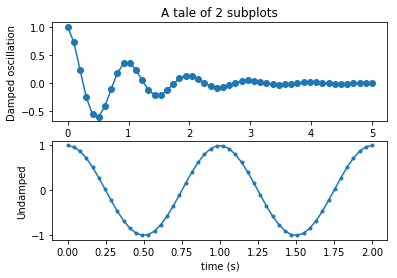

In [97]:
#Simple demo with multiple subplots.
import numpy as np
import matplotlib.pyplot as plt

# x data for plots 1 and 2
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
# y data for plots 1 and 2
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

#arrangement of subplots
nrows = 2
ncols = 1
idx = 1
plt.subplot(nrows, ncols, idx)
#the marker/line is specified by the 'o-'
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(nrows, ncols, idx+1)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
# For saving do this
# plt.savefig('subplots.png')
plt.show()
plt.close() #do this at end of each plot

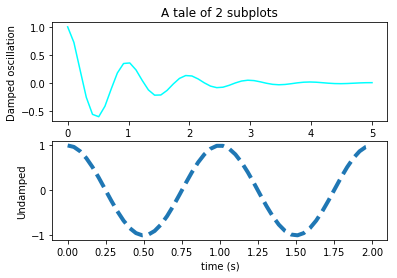

In [98]:
#revise the above graph to use a different line width,color and no symbols
plt.subplot(nrows, ncols, idx)
plt.plot(x1, y1, '-', color='cyan') #changes
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(nrows, ncols, idx+1)
plt.plot(x2, y2, '--', linewidth=4) #changes
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()
plt.close() #do this at end of each plot

### Images
An example of plotting a matrix as an image.

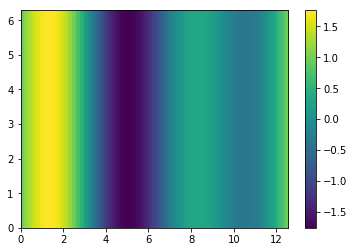

In [99]:
# data. Each is a 1D vector with 100 elements.
x = np.linspace(0.0, 4*np.pi,100)
y = np.linspace(0.0, 2*np.pi,100)
m=100
n=1
# print(x)
#repeat x by m times in n columns. Here it converts x to a 2D matrix and repeats that row 100 times in 1 column.
# This tiling is done only to create an image from a row vector but we do need a 2D matrix for imshow()
# therefore result is a 100x100 matrix
X = np.tile(x,(m,n))
# print(X)
Y = np.tile(y,(m,n))
c = np.sin(X) + np.cos(Y)
# extent is needed in order to get correct x,y values for the axes (instead of the matrix indices).
plt.imshow(c, extent=(np.amin(x), np.amax(x), np.amin(y), np.amax(y)), aspect = 'auto')
plt.colorbar()
plt.savefig('image.png')


## Lesson 14 - Reading a Data file using Open and Read
The best file reading method is data-dependent. My rule-of-thumb is that when the data are in a structured, matrix form (fixed number of rows and columns with a single type in each column) they are best read with Pandas DataFrame <b>from_csv</b>, and that for all other structures you will likely need to use the <b>open</b> and <b>read</b> functions. Given that Lesson 12 already covered some Pandas basics, I'll focus on the more low level functions.<br>
Many resources on the web will recommend doing this like the following simple example, which assumes you have "myfile.txt" text file in the same directory as this python code.


In [100]:
#read myfile without a context manager.
idx = 0
infile = open('myfile.txt', 'r')
for line in infile:
    #print each line of the file regardless of what's in it with prefix (linenumber:)
    # If the text file has line returns at the end of each line, which inserts empty lines in the print() output.
    print('{0}:{1}'.format(idx,line))
    idx +=1
infile.close()

0:This is the first line!

1:And another.

2:3. is how I started this line.

3:Some random stuff: !@#~!##$%^#$%&(%^&(%*

4:END



But to properly handle your file resources you should actually use a <i>context manager</i> and the keyword for doing that is <b>with</b> to ensure that files get closed properly. Some recommend using <b>close</b> to do this but unfortunately there are many cases where this statement would be missed due to errors.

In [101]:
#read myfile by getting file handle 'infile' with a context manager.
idx = 0
with open('myfile.txt', 'r') as infile:
    for line in infile:
        #print each line of the file regardless of what's in it with prefix (linenumber:)
        # If the text file has line returns at the end of each line, empty lines will be inserted in the print() output.
        print('{0}:{1}'.format(idx,line))
        idx +=1
        

0:This is the first line!

1:And another.

2:3. is how I started this line.

3:Some random stuff: !@#~!##$%^#$%&(%^&(%*

4:END



In addition we would like to handle common error cases in a user-friendly fashion. Here are some typical cases. Test it out by inserting incorrect directory or filenames below.

In [102]:
import os
import sys
mydir = "/Users/pradau/mydata"
filename = "myfile.txt"
pathname = os.path.join(mydir, filename)
if not os.path.isdir(mydir):
    print("Your directory doesn't exist:", mydir)
    sys.exit(1)
if not os.path.isfile(pathname):
    print("Your file doesn't exist at this path:", pathname)
    sys.exit(1)
    
with open(pathname, 'r') as infile:
    for line in infile:
        #print each line of the file regardless of what's in it with prefix (linenumber:)
        # If the text file has line returns at the end of each line, empty lines will be inserted in the print() output.
        print('{}'.format(line))
        

This is the first line!

And another.

3. is how I started this line.

Some random stuff: !@#~!##$%^#$%&(%^&(%*

END



To do something useful with the data you will typically need to parse each line. Here's an example where the lines are each put in separate lists by splitting at the whitespace (and throwing the whitespace away, such as spaces and tabs).


In [103]:
mylist = []
with open(pathname, 'r') as infile:
    for line in infile:
        mylist.append(line.split())
print(mylist)

[['This', 'is', 'the', 'first', 'line!'], ['And', 'another.'], ['3.', 'is', 'how', 'I', 'started', 'this', 'line.'], ['Some', 'random', 'stuff:', '!@#~!##$%^#$%&(%^&(%*'], ['END']]


Either during or after the file reading you might want to do some data cleaning. Here's a simple example of cleaning during the file read that eliminates list items that are not alphanumeric.

In [104]:
mylist = []
with open(pathname, 'r') as infile:
    for line in infile:
        rowlist = line.split()
        #this applies a filter to the list to eliminate non-alphanumeric items.
        rowclean = [x for x in rowlist if x.isalnum()]
        mylist.append(rowclean)
print(mylist)

[['This', 'is', 'the', 'first'], ['And'], ['is', 'how', 'I', 'started', 'this'], ['Some', 'random'], ['END']]


Here's a basic script to read a file with either TIME or STIM or KEY in the first 4 characters, followed by data. Notice that the stimulus is an array so it can't be easily read by Pandas read_csv(). In addition we can use this method to do some organization of disorderly data. In this case the assumption is that the first instance of the TIME,STIM,KEY lines should be put in a single record and so on to group all of the data into records.

In [105]:
#!/usr/bin/env python
#filename = input('Enter filename: ') #User entered name
filename = 'mystim.txt'  #hard-coded name
idx = 0
trial_time = []
stimulus = []
key = []
with open(filename, 'r') as infile:
    for line in infile:
        first = line[:4]
        last = line[6:]
        if 'TIME' in first:
            trial_time.append(float(last[:5]))
        elif 'STIM' in first:
            stimulus.append(last)
        elif 'KEY ' in first:
            key.append(float(last[0]))
        else:
            #do something here if you want to handle unexpected lines
            pass
        idx +=1

for idx in range(len(key)):
    print("Record",idx)
    print("trial_time {0}  stimulus {1}  key {2}\n".format(trial_time[idx], stimulus[idx], key[idx]))


Record 0
trial_time 2911.0  stimulus 0 2 3 5 10 20
  key 2.0

Record 1
trial_time 933.0  stimulus 3 4 6
  key 9.0



## Epilogue
Those people who are still on the fence about whether it is worth their time to transition from Matlab to Python should read this [blog post](http://www.pyzo.org/python_vs_matlab.html). There's a more balanced discussion on [Quora](https://www.quora.com/How-do-MATLAB-and-Python-especially-SciPy-compare-for-scientific-computing). There's a wide world outside of Academia and the majority of people in the Data Science community are choosing Python or other languages like R. Here's a Google Trends plot showing how Python is faring in popularity. Not bad. :)

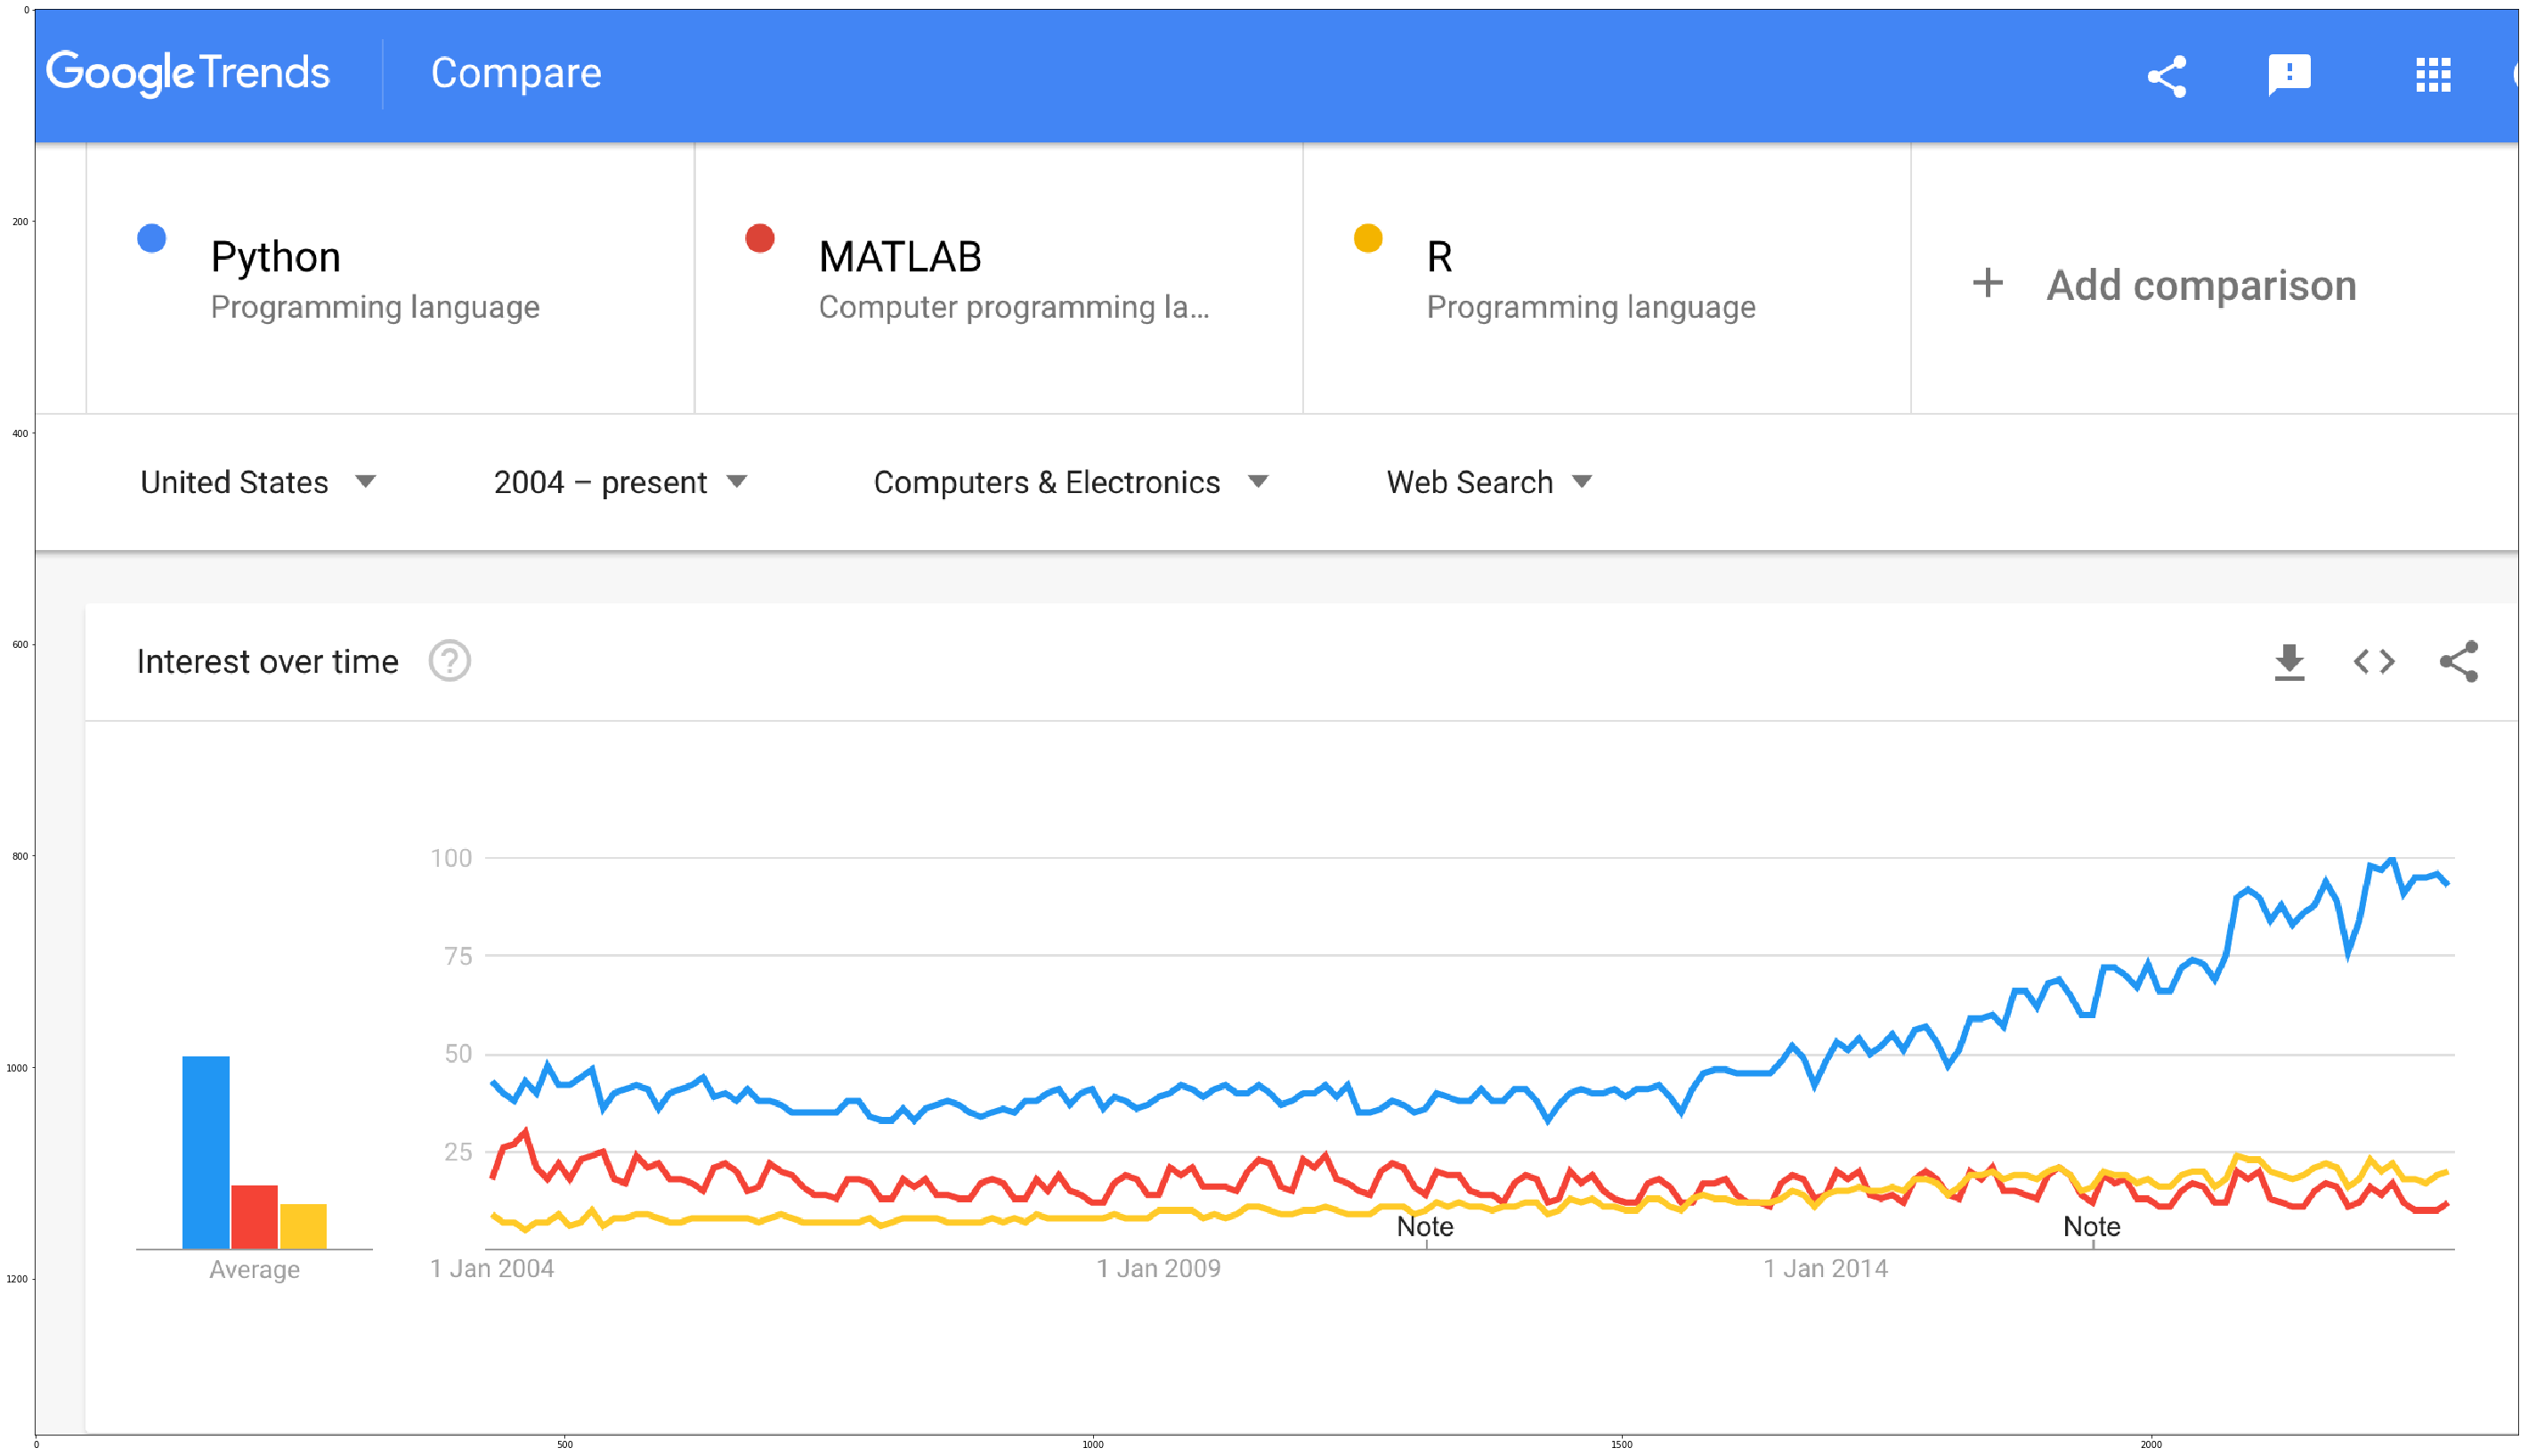

In [106]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('GoogleTrends.png')
plt.figure(figsize = (50,50))
plt.imshow(img)